In [1]:
import cv2
import numpy as np

ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1
ann_img[ 0 , 0 ] = 2 # this would set the label of pixel 0,0 as 2

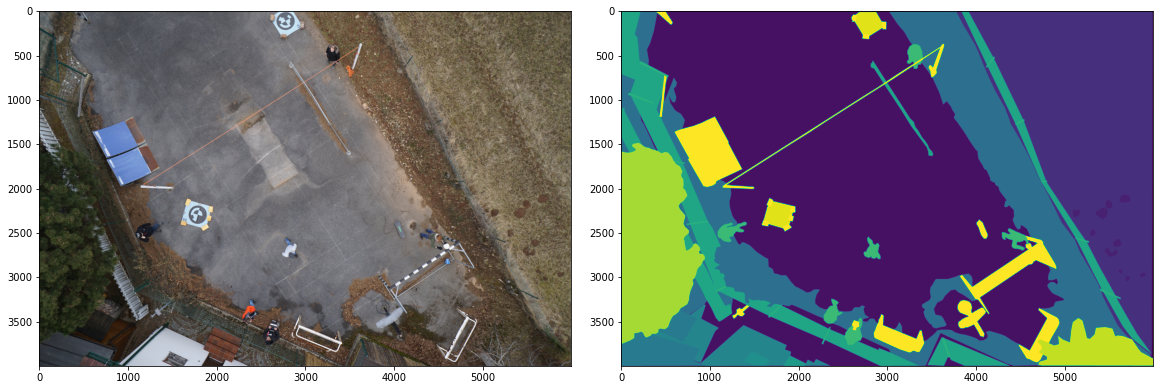

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "../data/aerialSemSegDroneDataset/dataset/semantic_drone_dataset/original_images/001.jpg"
label_image_semantic = "../data/aerialSemSegDroneDataset/dataset/semantic_drone_dataset/label_images_semantic/001.png"

fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

In [3]:
# View the data structure of the image:
label_image_semantic

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 9, ..., 0, 0, 0],
       [0, 0, 9, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
kaggle_commit = True

epochs = 20
if kaggle_commit:
    epochs = 5

In [6]:
from keras_segmentation.models.unet import vgg_unet

n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
model = vgg_unet(n_classes=n_classes ,  input_height=416, input_width=608  )

model.train( 
    train_images =  "../data/aerialSemSegDroneDataset/dataset/semantic_drone_dataset/original_images",
    train_annotations = "../data/aerialSemSegDroneDataset/dataset/semantic_drone_dataset/label_images_semantic",
    checkpoints_path = "vgg_unet" , 
    epochs=epochs,
    verify_dataset=False
)

  0%|          | 0/400 [00:00<?, ?it/s]

Verifying training dataset


100%|██████████| 400/400 [02:31<00:00,  2.64it/s]
C:\Users\derek\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Dataset verified! 
Epoch 1/5


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model_7/block1_conv1/Relu (defined at C:\Users\derek\anaconda3\envs\tf2\lib\site-packages\keras_segmentation\train.py:156) ]] [Op:__inference_train_function_3251]

Function call stack:
train_function


In [ ]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "C:\\Users\\derek\\Desktop\\Source Code\\data\\aerialSemSegDroneDataset\\dataset\\semantic_drone_dataset\\original_images\\001.jpg"
out = model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image-001.jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "C:\\Users\\derek\\Desktop\\Source Code\\data\\aerialSemSegDroneDataset\\dataset\\semantic_drone_dataset\\label_images_semantic\\001.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image-001.png')
axs[2].grid(False)

done = time.time()
elapsed = done - start